<a href="https://colab.research.google.com/github/shashankkshettyy/Pneumonia_classifier/blob/main/PneumoniaResNetandStandardCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from keras.layers import Dropout,BatchNormalization

model_transfer = Sequential()
pre_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',  # Change to 'avg'
    classes=1,  # Change to 1 for binary classification
)

for layer in pre_model.layers:
    layer.trainable = False

model_transfer.add(pre_model)
model_transfer.add(Flatten())
model_transfer.add(Dropout(0.5))  # Add dropout here
model_transfer.add(Dense(units=128, activation='relu'))
model_transfer.add(BatchNormalization())
model_transfer.add(Dense(units=1, activation='sigmoid'))  # Change to sigmoid for binary classification
model_transfer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                      

In [ ]:
model_transfer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model_transfer.fit(training_set ,steps_per_epoch=50 ,epochs = 30)


Epoch 1/30
50/50 [==============================] - 197s 4s/step - loss: 0.6888 - accuracy: 0.5775
Epoch 2/30
50/50 [==============================] - 176s 4s/step - loss: 0.5573 - accuracy: 0.7275
Epoch 3/30
50/50 [==============================] - 169s 3s/step - loss: 0.5253 - accuracy: 0.7400
Epoch 4/30
50/50 [==============================] - 154s 3s/step - loss: 0.5129 - accuracy: 0.7600
Epoch 5/30
50/50 [==============================] - 143s 3s/step - loss: 0.5743 - accuracy: 0.7225
Epoch 6/30
50/50 [==============================] - 136s 3s/step - loss: 0.5070 - accuracy: 0.7600
Epoch 7/30
50/50 [==============================] - 128s 3s/step - loss: 0.4649 - accuracy: 0.7975
Epoch 8/30
50/50 [==============================] - 113s 2s/step - loss: 0.5402 - accuracy: 0.7725
Epoch 9/30
50/50 [==============================] - 107s 2s/step - loss: 0.5019 - accuracy: 0.7750
Epoch 10/30
50/50 [==============================] - 100s 2s/step - loss: 0.5281 - accuracy: 0.7550
Epoch 11/

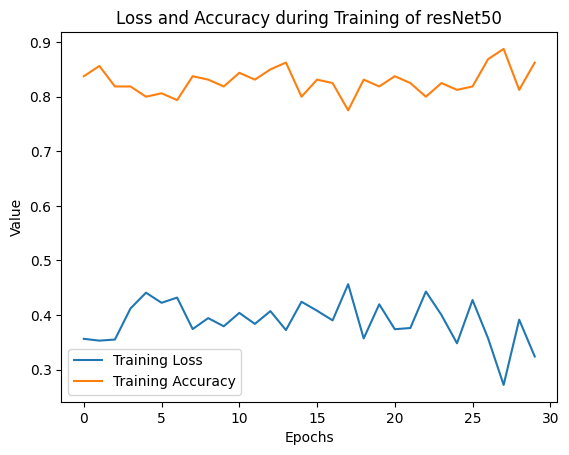

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training of resNet50')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_transfer.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

78/78 [==============================] - 139s 2s/step - loss: 0.3738 - accuracy: 0.8301
Test Loss: 0.3737655282020569
Test Accuracy: 0.8301281929016113


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/Dataset/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
images=np.vstack([test_image])
classes=model_transfer.predict(images,batch_size=10)
if classes[0]>0.5:
  print("Pneumonia")
else:
  print("Normal")

1/1 [==============================] - 0s 68ms/step
Normal


In [ ]:
#####################################################################################
##############   NORMAL CNN ##########################################################

In [ ]:
model=Sequential()
conv1=model.add(Conv2D(50,(1,1),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv1=model.add(Conv2D(50,(1,1),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv1=model.add(Conv2D(50,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv1=model.add(Conv2D(50,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit(training_set,steps_per_epoch = 20,epochs = 40)

Epoch 1/40
20/20 [==============================] - 4s 86ms/step - loss: 0.2470 - accuracy: 0.8813
Epoch 2/40
20/20 [==============================] - 2s 101ms/step - loss: 0.2604 - accuracy: 0.8938
Epoch 3/40
20/20 [==============================] - 2s 114ms/step - loss: 0.2218 - accuracy: 0.9062
Epoch 4/40
20/20 [==============================] - 3s 177ms/step - loss: 0.2640 - accuracy: 0.8750
Epoch 5/40
20/20 [==============================] - 4s 194ms/step - loss: 0.2908 - accuracy: 0.8687
Epoch 6/40
20/20 [==============================] - 7s 326ms/step - loss: 0.3338 - accuracy: 0.8750
Epoch 7/40
20/20 [==============================] - 4s 225ms/step - loss: 0.2346 - accuracy: 0.9000
Epoch 8/40
20/20 [==============================] - 5s 246ms/step - loss: 0.2649 - accuracy: 0.8875
Epoch 9/40
20/20 [==============================] - 3s 153ms/step - loss: 0.2722 - accuracy: 0.8625
Epoch 10/40
20/20 [==============================] - 4s 187ms/step - loss: 0.2449 - accuracy: 0.8875


In [ ]:
test_loss, test_accuracy = model.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

78/78 [==============================] - 7s 82ms/step - loss: 0.3535 - accuracy: 0.8702
Test Loss: 0.35345083475112915
Test Accuracy: 0.870192289352417


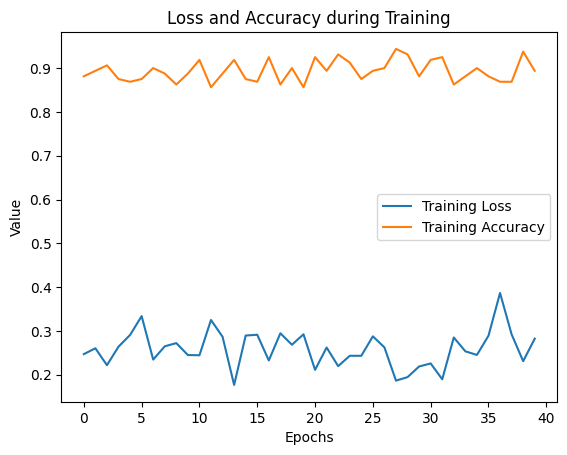

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history1.history['loss']
train_accuracy = history1.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/pneunomia_data/chest_xray/test/NORMAL/IM-0003-0001.jpeg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
images=np.vstack([test_image])
classes=model_transfer.predict(images,batch_size=10)
if classes[0]>0.5:
  print("Pneumonia")
else:
  print("Normal")

1/1 [==============================] - 0s 37ms/step
Normal
